#### Parte 3: Arquitectura de una CNN

Una arquitectura típica de CNN consiste en capas alternadas de convolución y pooling, seguidas de capas completamente conectadas:




- Una capa convolucional con 32 filtros, tamaño de kernel 3x3 y activación ReLU.
- Una capa de max pooling con tamaño de pool 2x2.
- Una segunda capa convolucional con 64 filtros, tamaño de kernel 3x3 y activación ReLU.
- Una segunda capa de max pooling con tamaño de pool 2x2.
- Una tercera capa convolucional con 64 filtros, tamaño de kernel 3x3 y activación ReLU.
- Una capa completamente conectada con 64 unidades y activación ReLU.
- Una capa de salida con 10 unidades y activación softmax (para una clasificación de 10 clases).



### Explicación

1. **Capas Convolucionales**:
   - `self.conv1`: 32 filtros, tamaño de kernel 3x3, activación ReLU.
   - `self.conv2`: 64 filtros, tamaño de kernel 3x3, activación ReLU.
   - `self.conv3`: 64 filtros, tamaño de kernel 3x3, activación ReLU.

2. **Capas de Pooling**:
   - `self.pool1`: Max pooling con tamaño 2x2.
   - `self.pool2`: Max pooling con tamaño 2x2.
   - `self.pool3`: Max pooling con tamaño 2x2.

3. **Capas Completamente Conectadas**:
   - `self.fc1`: 64 unidades, activación ReLU.
   - `self.fc2`: 10 unidades (para 10 clases de salida).

4. **Aplanado**:
   - `x = x.view(-1, 64 * 4 * 4)`: Aplanar las características antes de pasar a las capas completamente conectadas.

### Uso del Modelo

Para usar este modelo, puedes definir un conjunto de datos, un optimizador y un criterio de pérdida, y luego entrenar la red con tus datos.

import matplotlib.pyplot as plt
def visualize_feature_maps(x, title):
    num_filters = x.shape[1]
    fig, axes = plt.subplots(1, num_filters, figsize=(num_filters * 3, 6))  # Adjusted figure size
    for i in range(num_filters):
        if num_filters == 1:
            ax = axes
        else:
            ax = axes[i]
        ax.imshow(x[0, i].detach().numpy(), cmap='viridis')
        ax.axis('off')
    plt.suptitle(title, fontsize=16)
    plt.show()

# Importar Librerias

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.optim as optim
from PIL import Image
import numpy as np

# Descarga, carga y normalización de CIFAR-10

In [2]:
# Definir las transformaciones para los datos de entrenamiento y prueba
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data/', 
                                        train=True,
                                        download=True, 
                                        transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, 
                                          batch_size=4,
                                          shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', 
                                       train=False,
                                       download=True, 
                                       transform=transform)
testloader = torch.utils.data.DataLoader(testset, 
                                         batch_size=4,
                                         shuffle=False)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 
           'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [3]:
# Mostrar lote aleatorio de 4 imágenes de entrenamiento

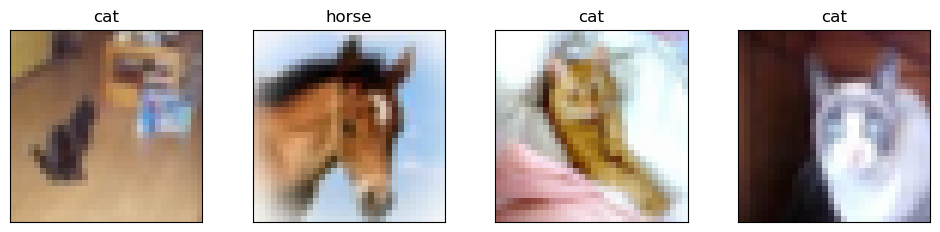

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def convert_to_imshow_format(image):
    # first convert back to [0,1] range from [-1,1] range
    image = image / 2 + 0.5
    image = image.numpy()
    # convert from CHW to HWC
    # from 3x32x32 to 32x32x3
    return image.transpose(1, 2, 0)

dataiter = iter(trainloader)
images, labels = next(dataiter)  # Use the next() function

fig, axes = plt.subplots(1, len(images), figsize=(12, 2.5))
for idx, image in enumerate(images):
    axes[idx].imshow(convert_to_imshow_format(image))
    axes[idx].set_title(classes[labels[idx]])
    axes[idx].set_xticks([])
    axes[idx].set_yticks([])

plt.show()

In [5]:
import torch
import torch.nn as nn

import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # Capa convolucional 1: 32 filtros, kernel 3x3, activación ReLU
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        # Capa de max pooling 1: tamaño del pool 2x2
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Capa convolucional 2: 64 filtros, kernel 3x3, activación ReLU
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        # Capa de max pooling 2: tamaño del pool 2x2
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Capa convolucional 3: 64 filtros, kernel 3x3, activación ReLU
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1)
        # Capa de max pooling 3: tamaño del pool 2x2
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        # Capa completamente conectada: 64 unidades, activación ReLU
        self.fc1 = nn.Linear(64 * 4 * 4, 64)
        # Capa de salida: 10 unidades (para clasificación en 10 clases), activación softmax
        self.fc2 = nn.Linear(64,10)
    def forward(self, x):
        # Aplicar la primera capa convolucional seguida de ReLU y pooling
        x = self.pool1(F.relu(self.conv1(x)))
        # Aplicar la segunda capa convolucional seguida de ReLU y pooling
        x = self.pool2(F.relu(self.conv2(x)))
        # Aplicar la tercera capa convolucional seguida de ReLU y pooling
        x = self.pool3(F.relu(self.conv3(x)))
        # Aplanar las características para la capa completamente conectada
        x = x.view(-1, 64 * 4 * 4)
        # Aplicar la primera capa completamente conectada seguida de ReLU
        x = F.relu(self.fc1(x))
        # Aplicar la capa de salida
        x = self.fc2(x)
        x = F.softmax(x, dim=1)
        return x

# Crear una instancia de la red
net = CNN()
# Mostrar la arquitectura del modelo
print(net)

CNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1024, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=10, bias=True)
)


In [6]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Entrenando la Red

In [7]:
import os

epochs = 2

model_directory_path = 'model/'
model_path = model_directory_path + 'cifar-10-cnn-model.pt'

if not os.path.exists(model_directory_path):
    os.makedirs(model_directory_path)

if os.path.isfile(model_path):
    # load trained model parameters from disk
    net.load_state_dict(torch.load(model_path))
    print('Loaded model parameters from disk.')
else:
    for epoch in range(epochs):  # loop over the dataset multiple times

        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs
            inputs, labels = data

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            if i % 2000 == 1999:    # print every 2000 mini-batches
                print('[%d, %5d] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 2000))
                running_loss = 0.0
    print('Finished Training.')
    torch.save(net.state_dict(), model_path)
    print('Saved model parameters to disk.')

Loaded model parameters from disk.


# Testeos

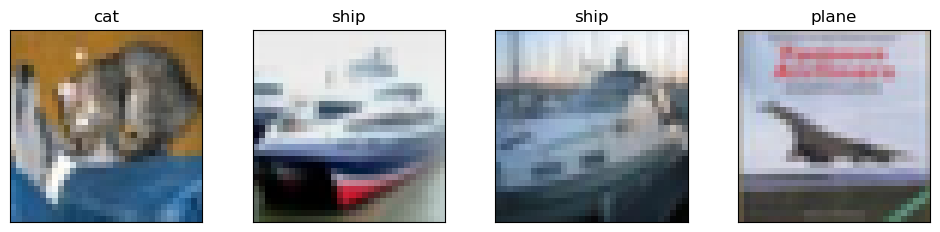

In [12]:
dataiter = iter(testloader)
images, labels = next(dataiter)  # Use the next() function

fig, axes = plt.subplots(1, len(images), figsize=(12, 2.5))
for idx, image in enumerate(images):
    axes[idx].imshow(convert_to_imshow_format(image))
    axes[idx].set_title(classes[labels[idx]])
    axes[idx].set_xticks([])
    axes[idx].set_yticks([])

plt.show()

In [13]:
outputs = net(images)

In [14]:
outputs

tensor([[4.0461e-05, 1.0047e-05, 2.0798e-03, 6.5043e-01, 1.5294e-07, 6.8391e-02,
         6.6833e-04, 3.5244e-09, 2.7837e-01, 1.5542e-05],
        [5.2944e-10, 5.3385e-06, 8.3371e-11, 9.1183e-10, 2.6940e-17, 3.0162e-14,
         6.1720e-12, 1.7907e-18, 9.9998e-01, 1.8430e-05],
        [4.3321e-08, 2.0456e-06, 1.3654e-08, 4.1786e-07, 5.6892e-13, 2.4218e-09,
         2.5289e-09, 4.9146e-13, 9.9995e-01, 4.6984e-05],
        [5.4353e-07, 8.4776e-09, 1.1567e-08, 5.0895e-09, 1.6186e-14, 5.8895e-12,
         4.8683e-12, 5.3453e-15, 1.0000e+00, 1.5942e-07]],
       grad_fn=<SoftmaxBackward0>)

* Utilizar Softmax para oftener puntuacion de probabilidad

In [15]:
sm = nn.Softmax(dim=1)
sm_outputs = sm(outputs)
print(sm_outputs)

tensor([[0.0884, 0.0884, 0.0886, 0.1694, 0.0884, 0.0947, 0.0885, 0.0884, 0.1168,
         0.0884],
        [0.0853, 0.0853, 0.0853, 0.0853, 0.0853, 0.0853, 0.0853, 0.0853, 0.2320,
         0.0853],
        [0.0853, 0.0853, 0.0853, 0.0853, 0.0853, 0.0853, 0.0853, 0.0853, 0.2320,
         0.0853],
        [0.0853, 0.0853, 0.0853, 0.0853, 0.0853, 0.0853, 0.0853, 0.0853, 0.2320,
         0.0853]], grad_fn=<SoftmaxBackward0>)


### Resultados
#### Imagen 1
- [0.0884, 0.0884, 0.0886, 0.1694, 0.0884, 0.0947, 0.0885, 0.0884, 0.1168,
         0.0884
- [plane,   car,   bird,   cat,   deer,   dog,   frog,   horse,   ship,   truck]]
* Probabilidad de qe el **primer** elemento sea de la categoria correcta es *0.08846**
* Probabilidad de qe el **segundo** elemento sea de la categoria correcta es *0.08846**
* Probabilidad de qe el **tercer** elemento sea de la categoria correcta es *0.08868**
* Probabilidad de qe el **cuarto** elemento sea de la categoria correcta es *0.16945**
* Probabilidad de qe el **quinto** elemento sea de la categoria correcta es *0.08844**
* Probabilidad de qe el **sexto** elemento sea de la categoria correcta es *0.09475**
* Probabilidad de qe el **septimo** elemento sea de la categoria correcta es *0.08854**
* Probabilidad de qe el **octavo** elemento sea de la categoria correcta es *0.08843**
* Probabilidad de qe el **noveno** elemento sea de la categoria correcta es *0.11684**
* Probabilidad de qe el **decimo** elemento sea de la categoria correcta es *0.08846**